## Week 3 - Introduction to Machine Learning

### Gradient Descent

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

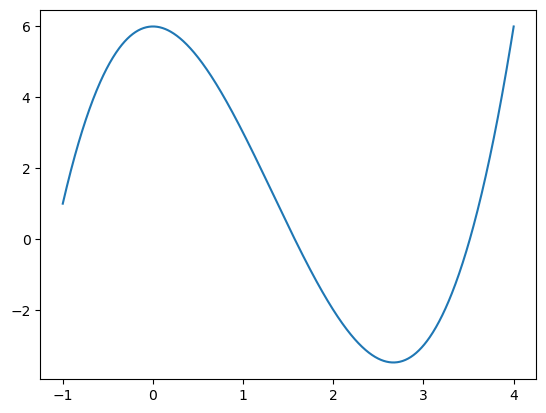

In [2]:
f_x = lambda x: (x**3)-4*(x**2)+6
x = np.linspace(-1,4,1000)
#Plot the curve
plt.plot(x, f_x(x))
plt.show()

In [3]:
f_x_derivative = lambda x: 3*(x**2)-8*x

In [4]:
def plot_gradient(x, y, x_vis, y_vis):
    plt.subplot(1,2,2)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x, f_x(x), c = "r")
    plt.title("Gradient Descent")
    plt.show()
    plt.subplot(1,2,1)
    plt.scatter(x_vis, y_vis, c = "b")
    plt.plot(x,f_x(x), c = "r")
    plt.xlim([2.0,3.0])
    plt.title("Zoomed in Figure")
    plt.show()
     
def gradient_iteration(x_start, iterations, learning_rate):
     
    # These x and y value lists will be used later for visualization.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    # Keep looping until number of iterations
    for i in range(iterations):
         
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
         
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)        
         
        x_grad.append(x_start)
        y_grad.append(f_x(x_start))
    print ("Local minimum occurs at: {:.6f}".format(x_start))
    print ("Number of steps: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)
    return y_grad

Local minimum occurs at: 2.666581
Number of steps:  25


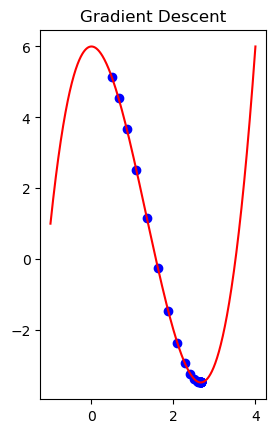

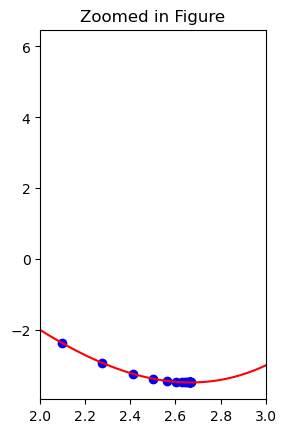

In [5]:
# gradyen iniş fonksiyonunu 0.5 değerinden başlatıp 1000 iterasyon ile 0.05 öğrenme oranıyla çalıştırıyoruz.
y_grad = gradient_iteration(0.5, 25, 0.05)

In [6]:
def gradient_precision(x_start, precision, learning_rate):
     
    # These x and y value lists will be used later for visualisation.
    x_grad = [x_start]
    y_grad = [f_x(x_start)]
    while True:
         
        # Get the Slope value from the derivative function for x_start
        # Since we need negative descent (towards minimum), we use '-' of derivative
        x_start_derivative = - f_x_derivative(x_start)
         
        # calculate x_start by adding the previous value to 
        # the product of the derivative and the learning rate calculated above.
        x_start += (learning_rate * x_start_derivative)
         
         
        x_grad.append(x_start)        
        y_grad.append(f_x(x_start))
        # Break out of the loop as soon as we meet precision.
        if abs(x_grad[len(x_grad)-1] - x_grad[len(x_grad)-2]) <= precision:
            print ("Local minimum occurs at: {:.2f}".format(x_start))
            break
            
    print ("Number of steps taken: ",len(x_grad)-1)
    plot_gradient(x, f_x(x) ,x_grad, y_grad)

Local minimum occurs at: 2.67
Number of steps taken:  20


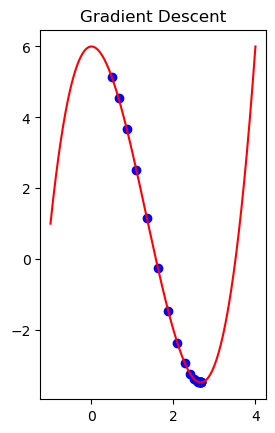

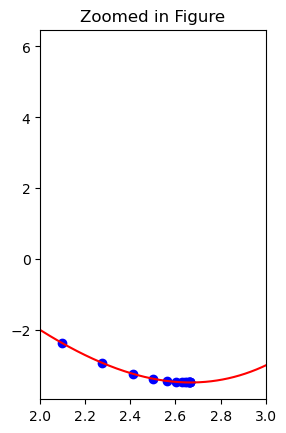

In [7]:
gradient_precision(0.5, 0.001, 0.05)

### Mean Squared Error

$MSE = \frac{1}n \sum_{i=1}^n (\hat{Y_i} - Y_i)^2$

In [8]:
y_1 = y_grad[0]
y_2 = y_grad[1]
# mean square error of two values from gradient descent
def mean_square_error(x, y):
    return np.mean((x-y)**2)

print(f'({y_1:.2f}, {y_2:.2f}) MSE:{mean_square_error(y_1, y_2):.4f}')

(5.12, 4.54) MSE:0.3479


### Simple Linear Regression

$y = mx +c$

In [9]:
# Importing numpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the pandas package
import pandas as pd

# Read the given CSV file, and view some sample records
advertising = pd.read_csv("Company_data.csv")
display(advertising)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
# Shape of our dataset
advertising.shape

(200, 4)

In [11]:
# Information of our dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
# Description of our dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


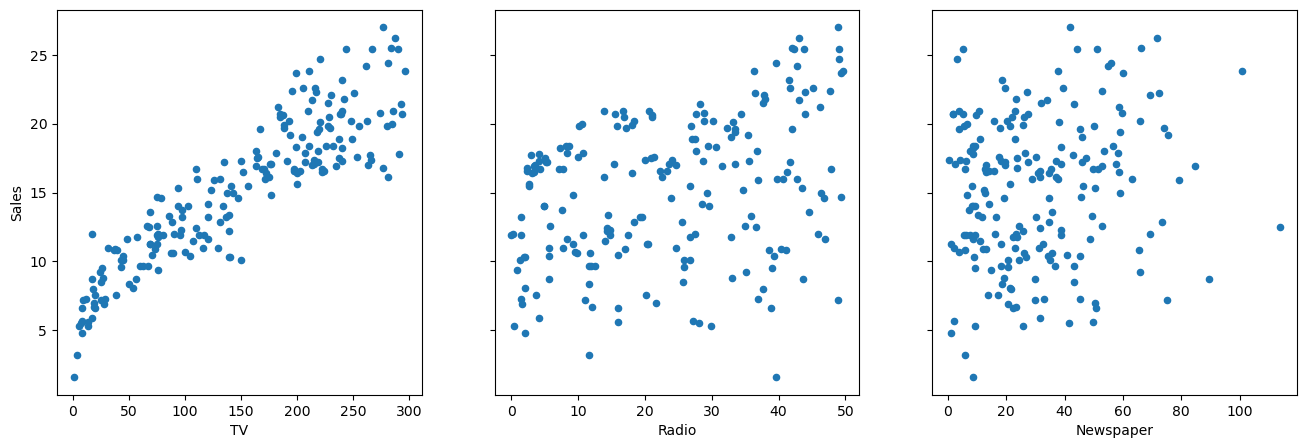

In [13]:
# Using only matplotlib subplots we'll visualize the data for correlation
fig, axs = plt.subplots(1, 3, sharey=True)
advertising.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 5))
advertising.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
advertising.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

### Linear Model

In [14]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']

In [15]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [16]:
# Adding additional column to the train and test data
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [17]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
linear_model = LinearRegression()

# Fit the model using .fit() method
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Intercept value
print("Intercept :",linear_model.intercept_)

# Slope value
print('Slope :',linear_model.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


In [19]:
# Making Predictions of y_value
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

from sklearn.metrics import r2_score

train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

# Comparing the r2 value of both train and test data
print(f"Score of the model with training set: {train_score:.5f}")
print(f"Score of the model with test set: {test_score:.5f}")

Score of the model with training set: 0.81579
Score of the model with test set: 0.79210


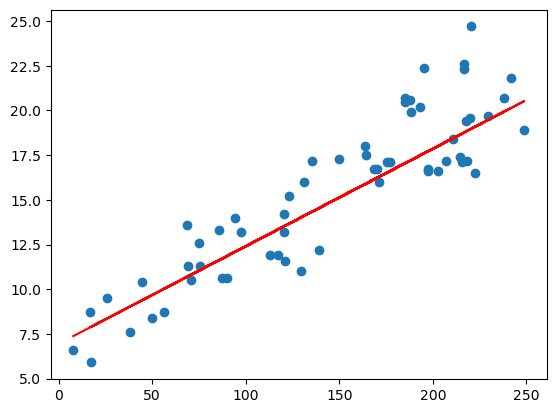

In [20]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### Multi-Linear Regression

$y = m_1x_1 + m_2x_2 + m_3x_3 ... + m_px_p + c$ 

In [21]:
# Creating X and y
X = advertising.drop('Sales', axis=1)
y = advertising['Sales']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [23]:
# Creating an object of Linear Regression
multi_linear_model = LinearRegression()

# Fit the model using .fit() method
multi_linear_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Intercept value
print("Intercept :",multi_linear_model.intercept_)

# Slope value
print('Coefficient :',multi_linear_model.coef_)

Intercept : 4.334595861728431
Coefficient : [0.05382911 0.11001224 0.00628995]


In [25]:
# Making Predictions of y_value
y_test_pred = multi_linear_model.predict(X_test)

test_score = r2_score(y_test, y_test_pred)

# r2 value of test data
print(f"Score of the model with test set: {test_score:.5f}")

Score of the model with test set: 0.86560


In [26]:
multi_linear_model.score(X_test, y_test)

0.8655979373420273

### Logistic Regression

In [27]:
iris_data = pd.read_csv("Iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
# Shape of our dataset
iris_data.shape

(150, 6)

In [29]:
# Info our dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

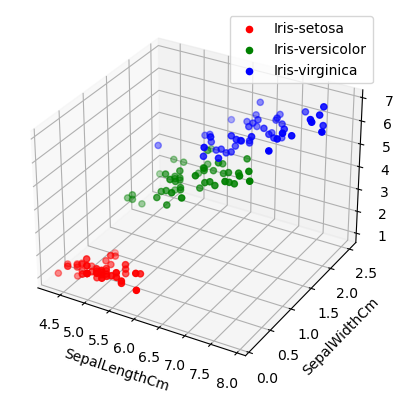

In [32]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the colors for each unique label
colors = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

# Loop through each unique label and plot the corresponding data points
for label in iris_data['Species'].unique():
    data = iris_data[iris_data['Species'] == label]
    ax.scatter(data['SepalLengthCm'], data['PetalWidthCm'], data['PetalLengthCm'], c=colors[label], label=label)

# Set the axis labels
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')

# Set the legend
ax.legend()

# Show the plot
plt.show()

In [33]:
# Creating X and y
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [35]:
from sklearn.linear_model import LogisticRegression

# Creating an object of Linear Regression
logical_model = LogisticRegression()

# Fit the model using .fit() method
logical_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
logical_model.score(X_test, y_test)

0.9777777777777777

### XOR Problem

In [37]:
# Set the random seed for reproducibility
np.random.seed(123)

# Generate random binary inputs
input_1 = np.random.randint(0, 100, 1000)
input_2 = np.random.randint(0, 100, 1000)

xor = []

for i_1, i_2 in zip(input_1, input_2):
    xor.append(np.logical_xor(1 if i_1 >= 50 else 0, 1 if i_2 >= 50 else 0))

df_xor = pd.DataFrame({'input_1': input_1, 'input_2': input_2, 'xor': xor})
df_xor

,input_1,input_2,xor
0,66,31,True
1,92,0,True
2,98,8,True
3,17,49,False
4,83,70,False
...,...,...,...
995,26,69,True
996,80,63,False
997,37,29,False
998,79,66,False


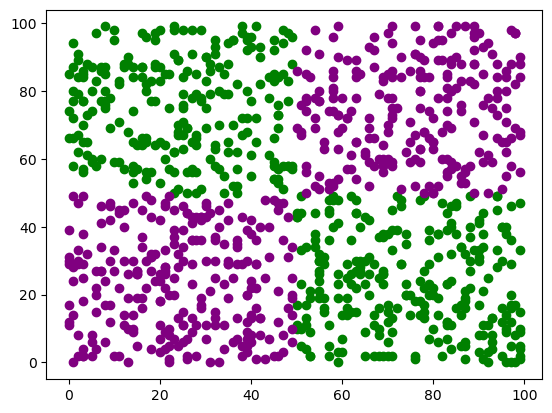

In [38]:
df_t = df_xor.loc[df_xor.xor == 1]
df_f = df_xor.loc[df_xor.xor == 0]

plt.scatter(x=df_t.input_1, y= df_t.input_2, c='g')
plt.scatter(x=df_f.input_1, y= df_f.input_2, c='purple')

plt.show()